<a href="https://www.analytiksinc.com">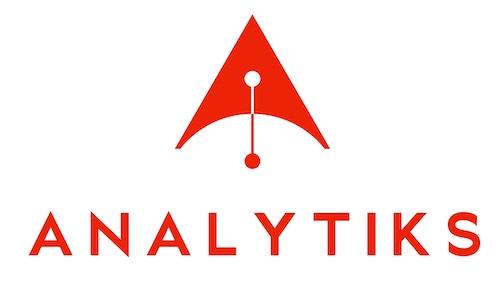</a>
<p style="text-align: right;"> © 2020. Analytiks Inc. </p>

# Exercise: Working with Different Data Formats

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
%autosave 10000000000

Autosaving every 10000000000 seconds


________

### 1.  Reading CSV/tab-delimited Files

#### a.  Load dataset Card_Txn.txt
* set trans_id as index
* parse transaction_date column as datetime

In [3]:
df = pd.read_csv('../Datasets/Card_Txn.txt', sep='\t', index_col='trans_id', parse_dates=['transaction_date'])
df.dtypes

transaction_date     datetime64[ns]
cardholder_name              object
card_number                   int64
merchant                     object
amount                       object
merchant_category            object
dtype: object

View the first 3 rows

In [4]:
df.head(3)

,transaction_date,cardholder_name,card_number,merchant,amount,merchant_category
trans_id,,,,,,
QKC-9120319777,2019-02-11,Lise Morrott,6389266041847869,Janyx,$55473.61,Tools
ELP-5309375232,2018-12-30,Worthy Brognot,5283544963411826,Realcube,$42568.09,Music
XXU-6378550347,2019-06-20,Farlee Zorn,4405944397283757,Tavu,$6350.31,Industrial


______

# Reading Excel files with Multiple Sheets

#### a .Load all 3 excel sheets in Dataset sales-2014.xlsx  - combine into a single dataframe - use any method

###### Option 1: Read as separate DataFrames and concatenate

In [5]:
df_Jan = pd.read_excel('../Datasets/sales-2014.xlsx', sheet_name=0)
df_Feb = pd.read_excel('../Datasets/sales-2014.xlsx', sheet_name=1)
df_Mar = pd.read_excel('../Datasets/sales-2014.xlsx', sheet_name=2)

In [6]:
dfs = [df_Jan.shape, df_Feb.shape, df_Mar.shape]
dfs

[(134, 7), (108, 7), (142, 7)]

In [7]:
num_rows=0
for x,y in dfs:
    num_rows += x
print(num_rows)

384


In [8]:
pd.concat([df_Jan, df_Feb, df_Mar])

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55
...,...,...,...,...,...,...,...
137,737550,"Fritsch, Russel and Anderson",B1-65551,12,56.24,674.88,2014-03-31 08:43:24
138,642753,Pollich LLC,S1-93683,21,92.57,1943.97,2014-03-31 11:37:34
139,412290,Jerde-Hilpert,B1-20000,30,22.38,671.40,2014-03-31 21:41:31
140,307599,"Kassulke, Ondricka and Metz",S2-16558,46,56.04,2577.84,2014-03-31 22:11:22


##### Option 2: Read as dictionary of dataframes

In [9]:
df2 = pd.read_excel('../Datasets/sales-2014.xlsx', sheet_name=[0,1,2])

pd.concat([df2[i] for i in range(3)])

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55
...,...,...,...,...,...,...,...
137,737550,"Fritsch, Russel and Anderson",B1-65551,12,56.24,674.88,2014-03-31 08:43:24
138,642753,Pollich LLC,S1-93683,21,92.57,1943.97,2014-03-31 11:37:34
139,412290,Jerde-Hilpert,B1-20000,30,22.38,671.40,2014-03-31 21:41:31
140,307599,"Kassulke, Ondricka and Metz",S2-16558,46,56.04,2577.84,2014-03-31 22:11:22


##### Option 3: Load the entire Excel file to access all available sheets

To load an entire excel file, use the pandas Excelfile function (pd.Excelfile)

In [10]:
df3 = pd.ExcelFile('../Datasets/sales-2014.xlsx')

Access the sheet names via the sheet_names attribute

In [11]:
df3.sheet_names

['Jan-2014', 'Feb-2014', 'Mar-2014']

Read each sheet using the parse function

In [12]:
sh1 = df3.parse(0)
sh2 = df3.parse(1)
sh3 = df3.parse(2)

Check the DataFrames

In [13]:
display(sh1.head())
display(sh2.head())
display(sh3.head())

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55


,account number,name,sku,quantity,unit price,ext price,date
0,383080,Will LLC,B1-20000,7,33.69,235.83,2014-02-01 09:04:59
1,412290,Jerde-Hilpert,S1-27722,11,21.12,232.32,2014-02-01 11:51:46
2,412290,Jerde-Hilpert,B1-86481,3,35.99,107.97,2014-02-01 17:24:32
3,412290,Jerde-Hilpert,B1-20000,23,78.90,1814.70,2014-02-01 19:56:48
4,672390,Kuhn-Gusikowski,S1-06532,48,55.82,2679.36,2014-02-02 03:45:20


,account number,name,sku,quantity,unit price,ext price,date
0,163416,Purdy-Kunde,S1-30248,19,65.03,1235.57,2014-03-01 16:07:40
1,527099,Sanford and Sons,S2-82423,3,76.21,228.63,2014-03-01 17:18:01
2,527099,Sanford and Sons,B1-50809,8,70.78,566.24,2014-03-01 18:53:09
3,737550,"Fritsch, Russel and Anderson",B1-50809,20,50.11,1002.20,2014-03-01 23:47:17
4,688981,Keeling LLC,B1-86481,-1,97.16,-97.16,2014-03-02 01:46:44


Concatenate the Dataframes

In [14]:
pd.concat([df3.parse(i) for i in range(3)])

,account number,name,sku,quantity,unit price,ext price,date
0,740150,Barton LLC,B1-20000,39,86.69,3380.91,2014-01-01 07:21:51
1,714466,Trantow-Barrows,S2-77896,-1,63.16,-63.16,2014-01-01 10:00:47
2,218895,Kulas Inc,B1-69924,23,90.70,2086.10,2014-01-01 13:24:58
3,307599,"Kassulke, Ondricka and Metz",S1-65481,41,21.05,863.05,2014-01-01 15:05:22
4,412290,Jerde-Hilpert,S2-34077,6,83.21,499.26,2014-01-01 23:26:55
...,...,...,...,...,...,...,...
137,737550,"Fritsch, Russel and Anderson",B1-65551,12,56.24,674.88,2014-03-31 08:43:24
138,642753,Pollich LLC,S1-93683,21,92.57,1943.97,2014-03-31 11:37:34
139,412290,Jerde-Hilpert,B1-20000,30,22.38,671.40,2014-03-31 21:41:31
140,307599,"Kassulke, Ondricka and Metz",S2-16558,46,56.04,2577.84,2014-03-31 22:11:22


______

# Reading XML Files

<b>Use the "Card_Txn.xml" file.</b> <br><i>Attributes will be the same as the "Card_Txn.txt" file loaded above.</i>

#### a. Import BeautifulSoup

In [15]:
from bs4 import BeautifulSoup

#### b. Create Dataframe to hold data

In [16]:
df_xml = pd.DataFrame(columns=df.columns)
df_xml

,transaction_date,cardholder_name,card_number,merchant,amount,merchant_category


#### c. Load xml file and use find_all to get column series for each attribute

In [17]:
file = open("../Datasets/Card_Txn.xml", "r", encoding = "UTF-8")
xml = file.read()

soup = BeautifulSoup(xml, 'xml')
soup

<?xml version="1.0" encoding="utf-8"?>
<dataset>
<record><trans_id>JSD-0178960653</trans_id><transaction_date>5/11/2019</transaction_date><cardholder_name>Rutherford Lording</cardholder_name><card_number>677148579624544970</card_number><merchant>Vinte</merchant><amount>$31137.71</amount><merchant_category>Home</merchant_category></record><record><trans_id>GKU-7062163450</trans_id><transaction_date>5/1/2019</transaction_date><cardholder_name>Lexis Clem</cardholder_name><card_number>3575561119995306</card_number><merchant>Voolith</merchant><amount>$52772.97</amount><merchant_category>Electronics</merchant_category></record><record><trans_id>DGS-1584520428</trans_id><transaction_date>2/18/2019</transaction_date><cardholder_name>Merry Reinbech</cardholder_name><card_number>4903513865422556</card_number><merchant>Devbug</merchant><amount>$90272.14</amount><merchant_category>Industrial</merchant_category></record><record><trans_id>RDK-4763632267</trans_id><transaction_date>12/21/2018</transa

In [18]:
lst=[]
for i in range(len(df_xml.columns)):
    lst.append(soup.find_all(df_xml.columns[i]))

#list of lists
lst

[[<transaction_date>5/11/2019</transaction_date>,
  <transaction_date>5/1/2019</transaction_date>,
  <transaction_date>2/18/2019</transaction_date>,
  <transaction_date>12/21/2018</transaction_date>,
  <transaction_date>6/5/2019</transaction_date>,
  <transaction_date>9/19/2018</transaction_date>,
  <transaction_date>2/28/2019</transaction_date>,
  <transaction_date>3/4/2019</transaction_date>,
  <transaction_date>9/20/2018</transaction_date>,
  <transaction_date>10/26/2018</transaction_date>,
  <transaction_date>9/10/2018</transaction_date>,
  <transaction_date>8/23/2018</transaction_date>,
  <transaction_date>5/18/2019</transaction_date>,
  <transaction_date>3/30/2019</transaction_date>,
  <transaction_date>10/21/2018</transaction_date>,
  <transaction_date>11/9/2018</transaction_date>,
  <transaction_date>5/31/2019</transaction_date>,
  <transaction_date>7/15/2019</transaction_date>,
  <transaction_date>9/6/2018</transaction_date>,
  <transaction_date>8/18/2018</transaction_date>,
 

In [19]:
index_xml = soup.find_all('trans_id')
index_xml

[<trans_id>JSD-0178960653</trans_id>,
 <trans_id>GKU-7062163450</trans_id>,
 <trans_id>DGS-1584520428</trans_id>,
 <trans_id>RDK-4763632267</trans_id>,
 <trans_id>GYW-0468578849</trans_id>,
 <trans_id>RDK-3361944891</trans_id>,
 <trans_id>WSI-0918457595</trans_id>,
 <trans_id>JDD-5372760291</trans_id>,
 <trans_id>LGG-8219930864</trans_id>,
 <trans_id>IWY-8073182525</trans_id>,
 <trans_id>YST-0635980159</trans_id>,
 <trans_id>PXQ-1794169444</trans_id>,
 <trans_id>SKC-9200410620</trans_id>,
 <trans_id>AGB-4571862468</trans_id>,
 <trans_id>JZL-9617708091</trans_id>,
 <trans_id>AWB-7702541251</trans_id>,
 <trans_id>FSB-3618687241</trans_id>,
 <trans_id>YVM-6943315710</trans_id>,
 <trans_id>NWL-9648254090</trans_id>,
 <trans_id>SCD-2478691996</trans_id>,
 <trans_id>DGE-5726209976</trans_id>,
 <trans_id>BCZ-1824307695</trans_id>,
 <trans_id>RKO-3781666153</trans_id>,
 <trans_id>GJD-2481598852</trans_id>,
 <trans_id>ZNL-0504718285</trans_id>,
 <trans_id>ATA-3322163989</trans_id>,
 <trans_id>G

#### d. Use a for loop to iterate through each row, create a temporary row series and append each row to the dataframe prepared in b.

In [20]:
## remove tags
# index values
idx=[]
for i in range(len(index_xml)):
    idx.append(index_xml[i].text)

# column values
for i in range(len(lst)):
    for j in range(len(lst[i])):
        lst[i][j] = lst[i][j].text

In [21]:
# make a dict of lists
col_values={}
for i in range(len(df_xml.columns)):
    col_values[df_xml.columns[i]] = lst[i]
    
# create the dataframe
df_xml = pd.DataFrame(col_values, index=idx)
df_xml.index.name = 'trans_id'

#### Inspect the generated dataframe

In [22]:
df_xml

,transaction_date,cardholder_name,card_number,merchant,amount,merchant_category
trans_id,,,,,,
JSD-0178960653,5/11/2019,Rutherford Lording,677148579624544970,Vinte,$31137.71,Home
GKU-7062163450,5/1/2019,Lexis Clem,3575561119995306,Voolith,$52772.97,Electronics
DGS-1584520428,2/18/2019,Merry Reinbech,4903513865422556,Devbug,$90272.14,Industrial
RDK-4763632267,12/21/2018,Cam Gyenes,6371319891172316,Dabshots,$43191.84,Games
GYW-0468578849,6/5/2019,Shannen McNeice,345962828686621,Flipopia,$5380.67,Industrial
...,...,...,...,...,...,...
MRH-9934370687,8/9/2018,Estrella Cahey,5610400976382724,Meevee,$95862.61,Electronics
EOF-7027971286,9/16/2018,Anny Spirritt,30471630003140,Digitube,$13399.82,Beauty
QQY-1825173311,3/19/2019,Frasquito Sculley,374288053980362,LiveZ,$10840.27,Home


______

# Reading JSON Files

Dataset: roam_prescription_sample.json <br>
<a href="https://www.kaggle.com/roamresearch/prescriptionbasedprediction">Reference </a>

#### a. Load the json file:  roam_prescription_sample.json using the pandas "read_json" function

In [23]:
df_json = pd.read_json('../Datasets/roam_prescription_sample.json')

In [24]:
df_json

,cms_prescription_counts,npi,provider_variables
0,"{'DOXAZOSIN MESYLATE': 26, 'MIDODRINE HCL': 12...",1295763035,"{'settlement_type': 'non-urban', 'generic_rx_c..."
1,"{'CEPHALEXIN': 23, 'AMOXICILLIN': 52, 'HYDROCO...",1992715205,"{'settlement_type': 'non-urban', 'generic_rx_c..."
2,"{'CEPHALEXIN': 28, 'AMOXICILLIN': 73, 'CLINDAM...",1578587630,"{'settlement_type': 'non-urban', 'generic_rx_c..."
3,{'AMOXICILLIN': 63},1932278405,"{'settlement_type': 'non-urban', 'generic_rx_c..."
4,"{'PIOGLITAZONE HCL': 24, 'BENAZEPRIL HCL': 29,...",1437366804,"{'settlement_type': 'non-urban', 'generic_rx_c..."
...,...,...,...
95,"{'LANSOPRAZOLE': 24, 'LEVOTHYROXINE SODIUM': 2...",1265408389,"{'settlement_type': 'non-urban', 'generic_rx_c..."
96,"{'CLONAZEPAM': 44, 'DIAZEPAM': 12, 'GABAPENTIN...",1386674125,"{'settlement_type': 'urban', 'generic_rx_count..."
97,"{'AMOXICILLIN': 78, 'HYDROCODONE-ACETAMINOPHEN...",1184870503,"{'settlement_type': 'non-urban', 'generic_rx_c..."
98,{'AMOXICILLIN': 27},1962545350,"{'settlement_type': 'non-urban', 'generic_rx_c..."


#### b. Flatten the "provider_variables" column so that the attributes are in separate columns - use json_normalize

In [25]:
df_prov_vars = pd.json_normalize(df_json['provider_variables'])
df_prov_vars

,settlement_type,generic_rx_count,specialty,years_practicing,gender,region,brand_name_rx_count
0,non-urban,2287,Nephrology,7,M,South,384
1,non-urban,103,General Practice,7,M,South,0
2,non-urban,112,General Practice,7,M,Midwest,0
3,non-urban,63,General Practice,7,M,South,0
4,non-urban,1035,Nephrology,6,M,West,316
...,...,...,...,...,...,...,...
95,non-urban,998,Infectious Disease,7,M,South,822
96,urban,1804,Family,7,F,South,337
97,non-urban,214,Periodontics,5,M,Northeast,0
98,non-urban,27,General Practice,6,M,South,0


In [26]:
df_flat = df_json.join(df_prov_vars)

In [27]:
df_flat.drop(columns='provider_variables', inplace=True)

#### c. Set the variable "npi" from the original dataframe as the index

In [28]:
df_flat.set_index('npi')

,cms_prescription_counts,settlement_type,generic_rx_count,specialty,years_practicing,gender,region,brand_name_rx_count
npi,,,,,,,,
1295763035,"{'DOXAZOSIN MESYLATE': 26, 'MIDODRINE HCL': 12...",non-urban,2287,Nephrology,7,M,South,384
1992715205,"{'CEPHALEXIN': 23, 'AMOXICILLIN': 52, 'HYDROCO...",non-urban,103,General Practice,7,M,South,0
1578587630,"{'CEPHALEXIN': 28, 'AMOXICILLIN': 73, 'CLINDAM...",non-urban,112,General Practice,7,M,Midwest,0
1932278405,{'AMOXICILLIN': 63},non-urban,63,General Practice,7,M,South,0
1437366804,"{'PIOGLITAZONE HCL': 24, 'BENAZEPRIL HCL': 29,...",non-urban,1035,Nephrology,6,M,West,316
...,...,...,...,...,...,...,...,...
1265408389,"{'LANSOPRAZOLE': 24, 'LEVOTHYROXINE SODIUM': 2...",non-urban,998,Infectious Disease,7,M,South,822
1386674125,"{'CLONAZEPAM': 44, 'DIAZEPAM': 12, 'GABAPENTIN...",urban,1804,Family,7,F,South,337
1184870503,"{'AMOXICILLIN': 78, 'HYDROCODONE-ACETAMINOPHEN...",non-urban,214,Periodontics,5,M,Northeast,0


#### BONUS: Flatten the "cms_prescription_counts" column and join it to the flattened provider_variable dataframe created above

#### a. Flatten the "cms_prescription_counts" column so that the attributes are in separate columns - use json_normalize

In [29]:
df_cms = pd.json_normalize(df_flat['cms_prescription_counts'])
df_cms

,DOXAZOSIN MESYLATE,MIDODRINE HCL,MEGESTROL ACETATE,BENAZEPRIL HCL,METOLAZONE,NOVOLOG,DIAZEPAM,HYDRALAZINE HCL,SENSIPAR,LABETALOL HCL,...,RIFAMPIN,ASTEPRO,CEFTRIAXONE,DAPSONE,INVIRASE,SODIUM CHLORIDE,VYVANSE,ROZEREM,NAMENDA XR,CELEXA
0,26.0,12.0,11.0,11.0,73.0,12.0,24.0,50.0,94.0,28.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,29.0,NaN,NaN,26.0,12.0,90.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.0,13.0,15.0,18.0,23.0,52.0,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### b. Set the variable "npi" from the original dataframe as the index

####  c. Join the "provider_variable" dataframe with the "cms_prescription_counts" dataframe using the "join" function

In [30]:
df_flat = df_flat.join(df_cms)
df_flat.set_index('npi', inplace=True)
df_flat.drop(columns = 'cms_prescription_counts', inplace=True)

In [31]:
df_flat

,settlement_type,generic_rx_count,specialty,years_practicing,gender,region,brand_name_rx_count,DOXAZOSIN MESYLATE,MIDODRINE HCL,MEGESTROL ACETATE,...,RIFAMPIN,ASTEPRO,CEFTRIAXONE,DAPSONE,INVIRASE,SODIUM CHLORIDE,VYVANSE,ROZEREM,NAMENDA XR,CELEXA
npi,,,,,,,,,,,,,,,,,,,,,
1295763035,non-urban,2287,Nephrology,7,M,South,384,26.0,12.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992715205,non-urban,103,General Practice,7,M,South,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1578587630,non-urban,112,General Practice,7,M,Midwest,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1932278405,non-urban,63,General Practice,7,M,South,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1437366804,non-urban,1035,Nephrology,6,M,West,316,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265408389,non-urban,998,Infectious Disease,7,M,South,822,NaN,NaN,NaN,...,25.0,13.0,15.0,18.0,23.0,52.0,NaN,NaN,NaN,NaN
1386674125,urban,1804,Family,7,F,South,337,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1184870503,non-urban,214,Periodontics,5,M,Northeast,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


________